In [1]:
%matplotlib inline
# %matplotlib qt

Gradient decay
==========================================

Some results worth saving and displaying for visualization and understanding

1/ Decay of gradient variances with increasing qubit count
---------------------------

First importing the relevant packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from gadget_plots import *

data_folder = '../../results/data/'

# colours = [['#36226b', '#22236b', '#22656b', '#226b2b', '#606b22', '#6b4d22', '#6b2a22'],
#            ['#6f45d8', '#4547d8', '#45ccd8', '#45d859', '#c2d845', '#d89d45', '#d85645'],
#            ['#977dd8', '#7d7fd8', '#7dd1d8', '#7dd889', '#cbd87d', '#d8b47d', '#d8887d']]
# colours = np.array([plt.cm.PuRd(np.linspace(0, 1, 7)), 
#                     plt.cm.BuPu(np.linspace(0, 1, 7)),
#                     plt.cm.GnBu(np.linspace(0, 1, 7)),
#                     plt.cm.YlGn(np.linspace(0, 1, 7)),
#                     plt.cm.Greys(np.linspace(0, 1, 7))])
colours = np.array([plt.cm.Purples(np.linspace(0, 1, 10)), 
                    plt.cm.Blues(np.linspace(0, 1, 10)),
                    plt.cm.Oranges(np.linspace(0, 1, 10)),
                    plt.cm.Reds(np.linspace(0, 1, 10)),
                    plt.cm.Greys(np.linspace(0, 1, 10))])[:, 3:]

Exponential decay of the global Hamiltonian
$$H_G = \bigotimes_{i=1}^n \sigma_i^z $$

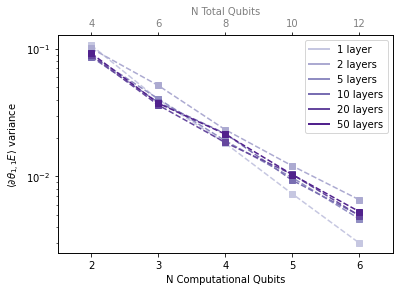

In [3]:
file_glob = data_folder + 'gradients/220401_global_circuit_6qubits_50layers_1000samples.dat'
plot_variances_vs_qubits([file_glob], [colours[0]])

Trainability of the local Hamiltonian
$$H_L = Z_1^{(c)} Z_2^{(c)}$$

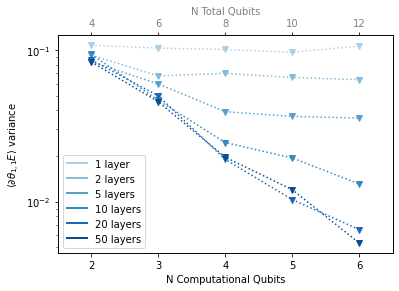

In [4]:
file_loc = data_folder + 'gradients/220401_local_circuit_6qubits_50layers_1000samples.dat'
plot_variances_vs_qubits([file_loc], [colours[1]])

Equivalent plot for the gadget decomposition of the global Hamiltonian
$$H^{gad} = H^{anc} + \lambda V 
    = (\mathbb{I} - Z_1^{(a)} Z_2^{(a)}) + (\mathbb{I} - Z_1^{(a)} Z_3^{(a)}) + (\mathbb{I} - Z_1^{(a)} Z_4^{(a)})
    + (\mathbb{I} - Z_2^{(a)} Z_3^{(a)}) + (\mathbb{I} - Z_2^{(a)} Z_4^{(a)}) + (\mathbb{I} - Z_3^{(a)} Z_4^{(a)}) 
    + \lambda (Z_1^{(c)} \otimes X_1^{(a)} + Z_2^{(c)} \otimes X_2^{(a)} + Z_3^{(c)} \otimes X_3^{(a)} + Z_4^{(c)} \otimes X_4^{(a)})$$
<span style="color:red">/!\ wrong implementation</span>.

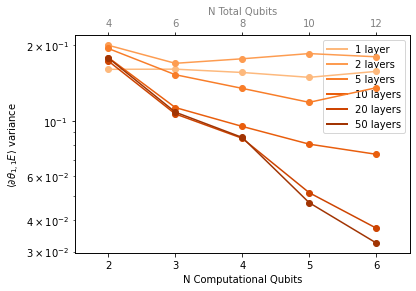

In [5]:
file_gad = data_folder + 'gradients/220402_gadget_circuit_6qubits_50layers_1000samples.dat'
plot_variances_vs_qubits([file_gad], [colours[2]])

Combining the plots of the normalized global, local and gadget Hamiltonians
<span style="color:red">/!\ wrong implementation</span>.

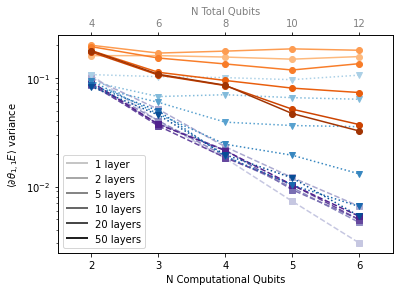

In [6]:
file_list = [data_folder + 'gradients/220401_global_circuit_6qubits_50layers_1000samples.dat',
             data_folder + 'gradients/220401_local_circuit_6qubits_50layers_1000samples.dat',
             data_folder + 'gradients/220402_gadget_circuit_6qubits_50layers_1000samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=False)

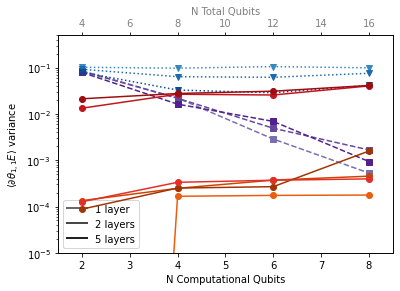

In [7]:
file_list = [data_folder + 'gradients/220406_global_circuit_8qubits_5layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220406_local_circuit_8qubits_5layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220406_gadget3_circuit_8qubits_5layers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220406_gadget2_circuit_8qubits_5layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours[:,-4:], normalize=False, limits=[1e-5, 5e-1])

combining data from:  
'gradients/220407_global_circuit_10qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_global_circuit_16qubits_50layers_0.5lambda_1000samples.dat', and
'gradients/220407_local_circuit_10qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_local_circuit_16qubits_50layers_0.5lambda_1000samples.dat'
'gradients/220410_gadget3_circuit_8qubits_50layers_0.5lambda_1000samples.dat' with 'gradients/220412_gadget3_circuit_10qubits_50layers_0.5lambda_1000samples.dat'

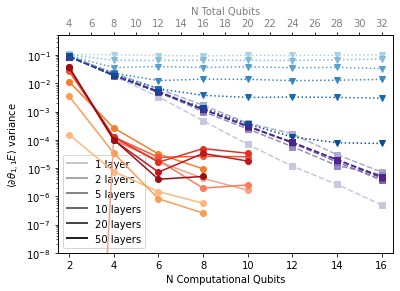

In [8]:
file_list = [data_folder + 'gradients/220412_global_circuit_16qubits_50layers_0.5lambda_1000samples-comb.dat',
             data_folder + 'gradients/220412_local_circuit_16qubits_50layers_0.5lambda_1000samples-comb.dat',
             data_folder + 'gradients/220411_gadget2_circuit_8qubits_50layers_0.5lambda_1000samples.dat',
             data_folder + 'gradients/220412_gadget3_circuit_10qubits_50layers_0.5lambda_1000samples-comb.dat']
# norm_file = data_folder + 'norms/gadget_6qubits_0.5lambda.dat'
# norm_dict = {'gadget': np.loadtxt(norm_file)[:,1]}
# %matplotlib widget
plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1], lambda_value=0.5)

In [9]:
norm_file = data_folder + 'norms/gadget_6qubits_0.5lambda.dat'
norm_dict = {'gadget': np.loadtxt(norm_file)[:,1]}
print(norm_dict['gadget'])

[1.125 4.375 9.625]


Variance evolution on the script using the StronglyEntanglingLayers and the ExpvalCost

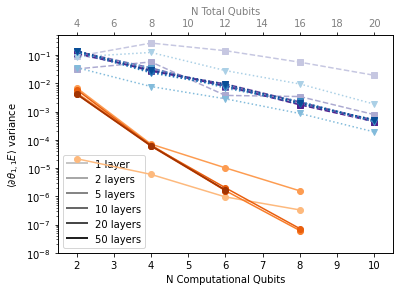

In [10]:
file_list = [data_folder + 'gradients/220413_global_10qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220413_local_10qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220413_gadget2_8qubits_50layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1])

Variance evolution when using the HardwareEfficientAnsatz and the ExpvalCost

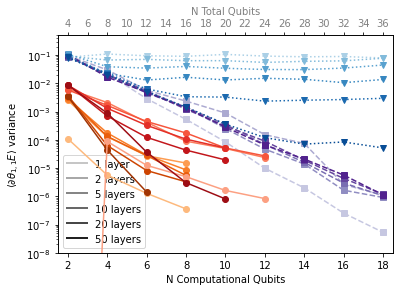

In [11]:
file_list = [data_folder + 'gradients/220414_global_18qubits_50layers_0.5lambda_200samples.dat',
             data_folder + 'gradients/220415_local_18qubits_50layers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220414_gadget2_8qubits_50layers_0.5lambda_200samples.dat', 
             data_folder + 'gradients/220419_gadget3_12qubits_50layers_0.5lambda_200samples.dat']

plot_variances_vs_qubits(file_list, colours, normalize=True, limits=[1e-8, 5e-1])

2/ Exploring the effect of λ and depth
-------------

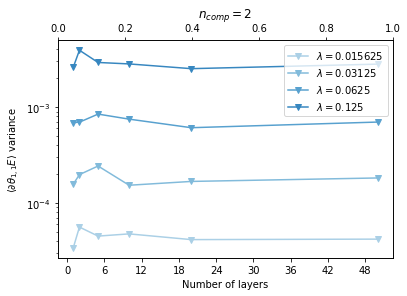

In [12]:
file = data_folder + 'gradients/220404_gadget_circuit_2qubits_50layers_200samples.dat'
plot_variances_vs_layers([file], [colours[1]])

Training
=======

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


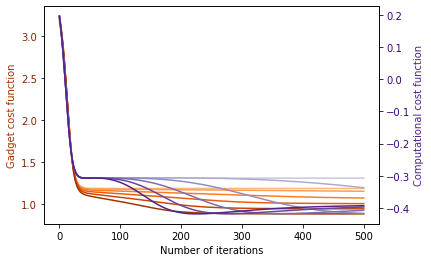

In [13]:
subfolder = 'training/gadget2/'
seed = 13
file_list = [data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_0.0lambda_seed{}.dat'.format(seed),
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_0.2lambda_seed{}.dat'.format(seed),
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_0.4lambda_seed{}.dat'.format(seed), 
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_0.6lambda_seed{}.dat'.format(seed),
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_0.8lambda_seed{}.dat'.format(seed),
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_1.0lambda_seed{}.dat'.format(seed)]
plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])


c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


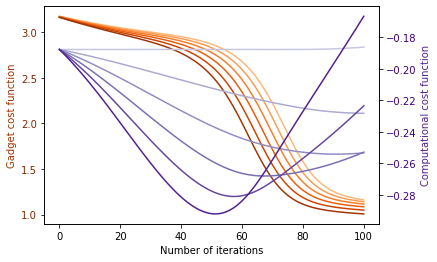

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


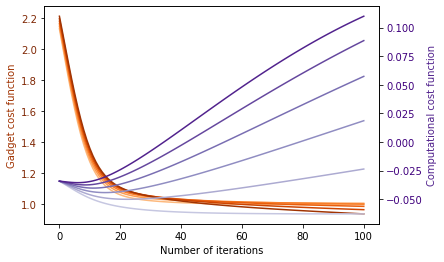

In [14]:
subfolder = 'training/gadget2/'
for seed in [14, 15]:
    file_list = [data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_100iterations_0.0lambda_seed{}.dat'.format(seed),
                data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_100iterations_0.2lambda_seed{}.dat'.format(seed),
                data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_100iterations_0.4lambda_seed{}.dat'.format(seed), 
                data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_100iterations_0.6lambda_seed{}.dat'.format(seed),
                data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_100iterations_0.8lambda_seed{}.dat'.format(seed),
                data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_100iterations_1.0lambda_seed{}.dat'.format(seed)]
    plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


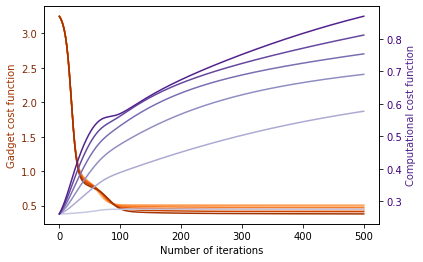

In [15]:
subfolder = 'training/gadget2/'
seed = 17
file_list = [data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_seed{}_0.0lambda.dat'.format(seed),
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_seed{}_0.2lambda.dat'.format(seed),
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_seed{}_0.4lambda.dat'.format(seed),
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_seed{}_0.6lambda.dat'.format(seed),
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_seed{}_0.8lambda.dat'.format(seed),
             data_folder + subfolder + '220419_training_gadget2_4qubits_2layers_500iterations_seed{}_1.0lambda.dat'.format(seed)]

# %matplotlib qt
plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


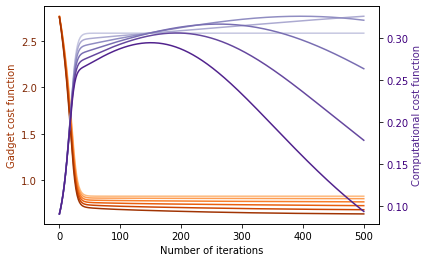

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


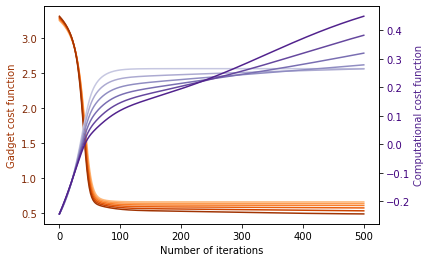

In [16]:
subfolder = 'training/gadget2/'
qubits = 4
layers = 2
for seed in [2, 3]:
    file_list = [data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.0lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.2lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.4lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.6lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.8lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_1.0lambda.dat'.format(qubits, layers, seed)]
    plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


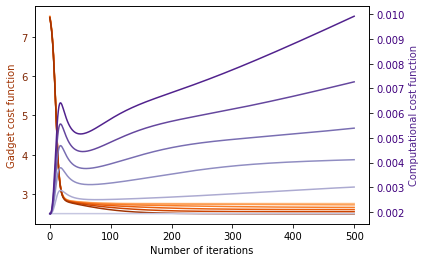

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


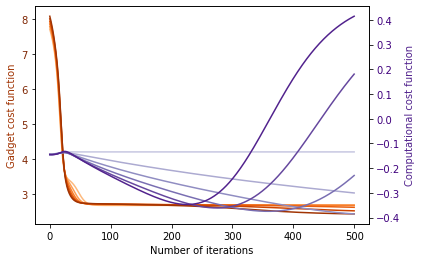

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


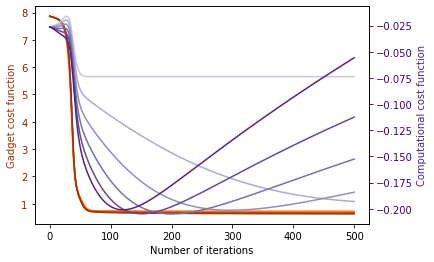

In [17]:
qubits = 6
layers = 2
for seed in [13, 14, 15]:
    file_list = [data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.0lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.2lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.4lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.6lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_0.8lambda.dat'.format(qubits, layers, seed),
                data_folder + subfolder + '220419_training_gadget2_{:02}qubits_{:02}layers_500iterations_seed{:02}_1.0lambda.dat'.format(qubits, layers, seed)]

    # %matplotlib qt
    plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


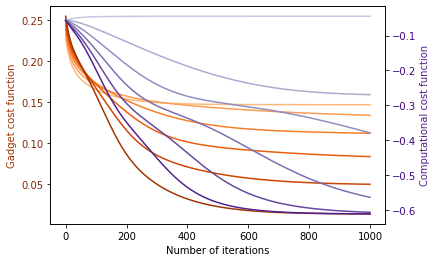

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


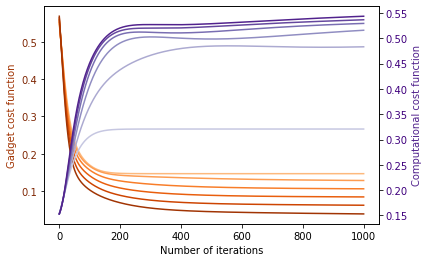

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


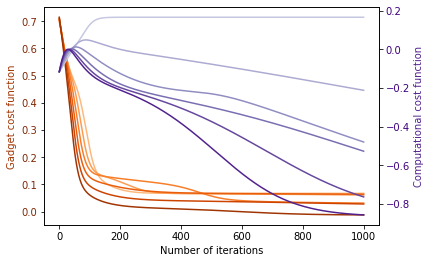

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


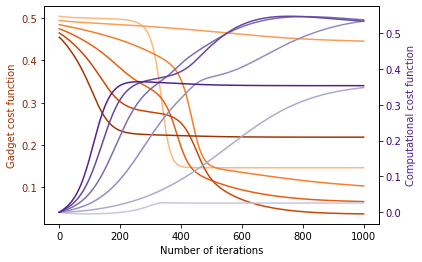

c:\Users\SimonC\OneDrive - ETH Zurich\1_Uni\2_QMIO\2_Experiments\thesis-venv\lib\site-packages\matplotlib\axis.py:124: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if labelcolor == 'inherit':


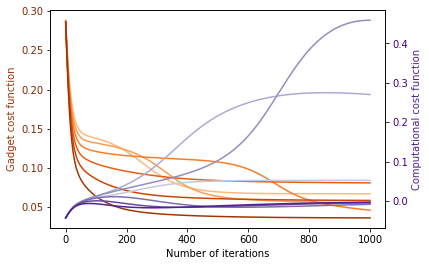

In [19]:
subfolder = 'training/gadget3/'
qubits = 4
layers = 2
iterations = 1000
for seed in [2, 3, 4, 5, 6]:
    file_list = [data_folder + subfolder + '220419_training_gadget3_{:02}qubits_{:02}layers_{}iterations_seed{:02}_{:1.1f}lambda.dat'.format(qubits, layers, iterations, seed, l) for l in np.linspace(0, 1, 6)]
    plot_training(file_list, np.swapaxes(colours, 0, 1)[:, [0, 2]])